## Загрузка библиотек

In [2]:
import numpy as np # для вычислений
import pandas as pd # для работы с датасетом
import matplotlib.pyplot as plt # для графиков
import seaborn as sns # для графиков
import datetime # для работы с датами
from sklearn.preprocessing import StandardScaler # для модели
from sklearn.cluster import KMeans # для модели
from sklearn.decomposition import PCA # для модели
from sklearn.metrics.pairwise import cosine_similarity # для модели
import requests # для парсинга
from io import StringIO # для парсинга



import warnings # для ошибок
warnings.filterwarnings(action="ignore")

## 1.1 Парсинг данных

Возьмем ссыллку с гитхаба на "сырой" файл csv с данными и преобразуем его в нормальный вид, чтобы мы смогли преобразовать данные в датасет и попробуем вывести первые пять элементов.

In [3]:
# Берём ссылку на файл, через requests запрашиваем текст и преобразует в нормальный вид через StringIO
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
s=requests.get(url).text
data=pd.read_csv(StringIO(s))
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Сразу можно заметить что у нас есть 67 колонок, присутствуют нулевые значения.

In [4]:
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Для оптимизации попробуем взять 40% датасета в пропорциональном количестве относительно месяцев.

In [4]:
# Преобразуем строки в даты
data['date'] = pd.to_datetime(data['date'])

In [5]:
print(f'До обработки: {len(data)} - 100%')
# Проверка размера каждой группы и установка соответствующего размера выборки.
sample_sizes = {}
for name, group in data.groupby(data['date'].dt.to_period('M')):
    sample_size = int(len(group) * 0.4)
    sample_sizes[name] = sample_size

# Возьмём выборку из 40 % строк из каждой группы месяцев
sample_df = data.groupby(data['date'].dt.to_period('M')).apply(lambda x: x.sample(n=sample_sizes[x.name], replace=False))

# Удалим новый уровень в индексе, который соответствует столбцу группировки
sample_df = sample_df.reset_index(drop=True)
print(f'После обработки: {len(sample_df)} - 40%')

До обработки: 380574 - 100%
После обработки: 152210 - 40%


По итогу у нас получился датасет с 150632 строками, что говорит нам о том что у нас всё получилось, т.к. это почти 40% от изначального датасета. С таким датасетом будет куда проще работать, т.к. такой датасет будет более оптимизированным из-за меньшего кол-ва данных.

In [7]:
sample_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,TZA,Africa,Tanzania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,26.7,47.953,0.7,65.46,0.529,65497752.0,NaN,NaN,NaN,NaN
1,SEN,Africa,Senegal,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
2,HTI,North America,Haiti,2020-01-30,NaN,0.0,0.0,NaN,0.0,0.0,...,23.1,22.863,0.7,64.00,0.510,11585003.0,NaN,NaN,NaN,NaN
3,GIN,Africa,Guinea,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,17.450,0.3,61.60,0.477,13859349.0,NaN,NaN,NaN,NaN
4,GHA,Africa,Ghana,2020-01-16,NaN,0.0,0.0,NaN,0.0,0.0,...,7.7,41.047,0.9,64.07,0.611,33475870.0,NaN,NaN,NaN,NaN


## 1.2 Предобработка данных и выделение значимых атрибутов

Проанализируем наш датасет и выделим значимые атрибуты и уберём неинформативные атрибуты. Так мы сможем улучшить качество обучения и кластеризации.

In [6]:
ops = {}
# Вычислим долю пропущенных значений в каждом столбце
missing_series = data.isnull().sum() / data.shape[0]
missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

# Сортируем по доле пропущенных значений по убыванию
missing_stats = missing_stats.sort_values('missing_fraction', ascending = False)

# Найдите столбцы с недостающим процентом выше порогового значения
record_missing = pd.DataFrame(missing_series[missing_series >0.3]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})
to_drop = list(record_missing['feature'])
ops['missing'] = to_drop

In [7]:
data2 = data.drop(ops['missing'], axis=1)

In [8]:
# Колонки с пропусками
hcols_with_na = [c for c in data2.columns if data2[c].isnull().sum() > 0]
hcols_with_na

['continent',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'life_expectancy',
 'human_development_index']

#### Заполнение пропущенных значений

In [9]:
data2_drop = data2.copy(deep=True)

In [10]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data2_drop.columns:
    # Количество пустых значений 
    temp_null_count = data2_drop[data2_drop[col].isnull()].shape[0]
    dt = str(data2_drop[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data2_drop.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
        med = data2_drop[col].median()
        data2_drop[col] = data2_drop[col].fillna(med)

Колонка total_cases. Тип данных float64. Количество пустых значений 39073, 10.27%.
Колонка new_cases. Тип данных float64. Количество пустых значений 11070, 2.91%.
Колонка new_cases_smoothed. Тип данных float64. Количество пустых значений 12300, 3.23%.
Колонка total_deaths. Тип данных float64. Количество пустых значений 61129, 16.06%.
Колонка new_deaths. Тип данных float64. Количество пустых значений 10789, 2.83%.
Колонка new_deaths_smoothed. Тип данных float64. Количество пустых значений 12019, 3.16%.
Колонка total_cases_per_million. Тип данных float64. Количество пустых значений 39073, 10.27%.
Колонка new_cases_per_million. Тип данных float64. Количество пустых значений 11070, 2.91%.
Колонка new_cases_smoothed_per_million. Тип данных float64. Количество пустых значений 12300, 3.23%.
Колонка total_deaths_per_million. Тип данных float64. Количество пустых значений 61129, 16.06%.
Колонка new_deaths_per_million. Тип данных float64. Количество пустых значений 10789, 2.83%.
Колонка new_deat

In [11]:
data2.isnull().sum()

iso_code                               0
continent                          18275
location                               0
date                                   0
total_cases                        39073
new_cases                          11070
new_cases_smoothed                 12300
total_deaths                       61129
new_deaths                         10789
new_deaths_smoothed                12019
total_cases_per_million            39073
new_cases_per_million              11070
new_cases_smoothed_per_million     12300
total_deaths_per_million           61129
new_deaths_per_million             10789
new_deaths_smoothed_per_million    12019
population_density                 57152
median_age                         79899
aged_65_older                      90284
aged_70_older                      82911
gdp_per_capita                     85785
cardiovasc_death_rate              85221
diabetes_prevalence                69995
life_expectancy                    30201
human_developmen

In [12]:
data2_drop.isnull().sum()

iso_code                               0
continent                          18275
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
population_density                     0
median_age                             0
aged_65_older                          0
aged_70_older                          0
gdp_per_capita                         0
cardiovasc_death_rate                  0
diabetes_prevalence                    0
life_expectancy                        0
human_developmen

In [13]:
data2_drop["continent"] = data2_drop["continent"].fillna(data2_drop["location"])

In [14]:
data2_drop.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
life_expectancy                    0
human_development_index            0
population                         0
dtype: int64

In [14]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True)
        plt.show()

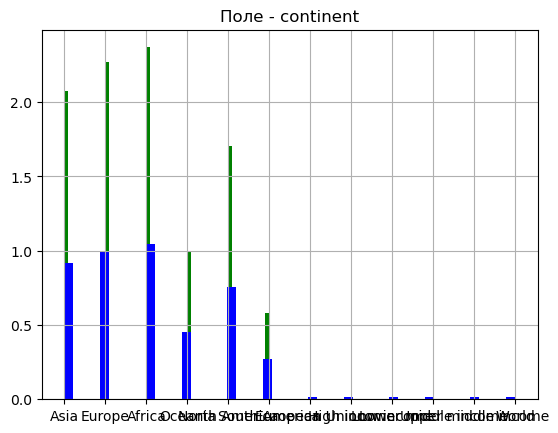

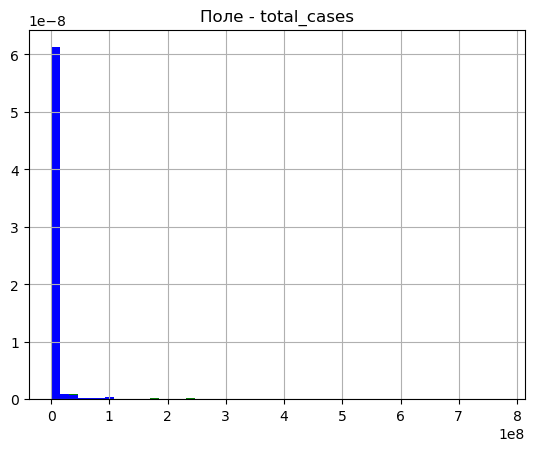

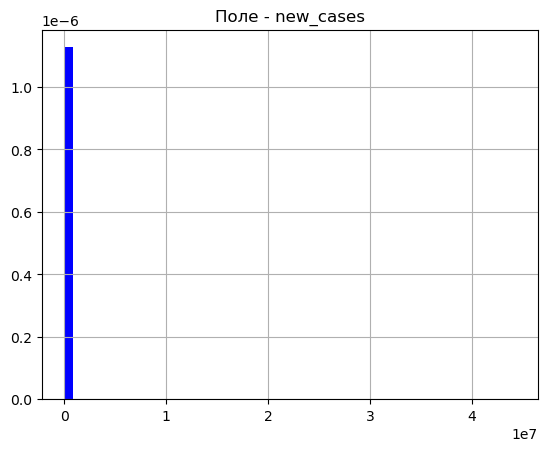

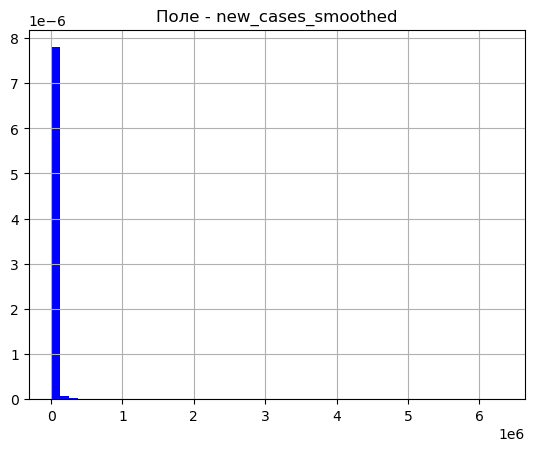

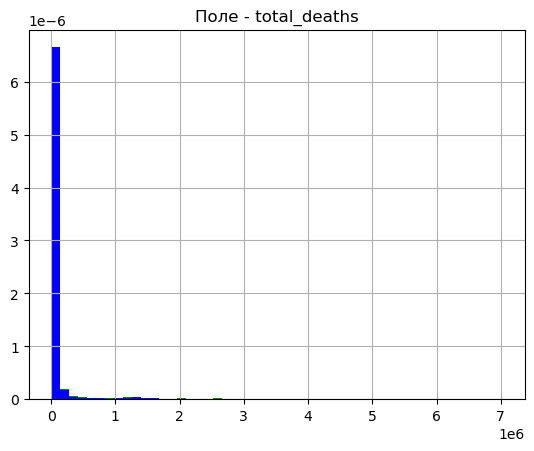

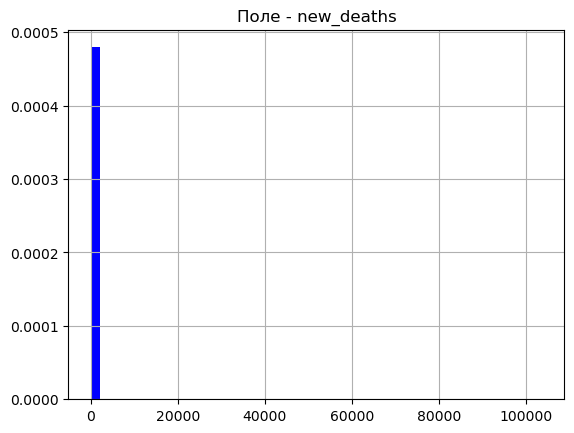

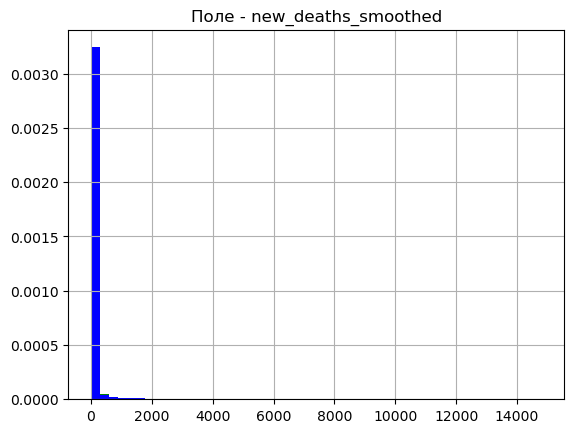

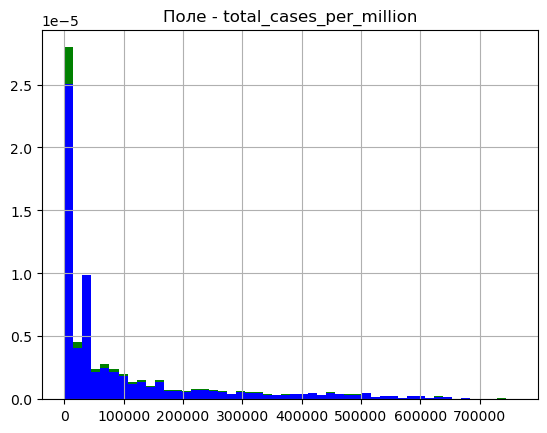

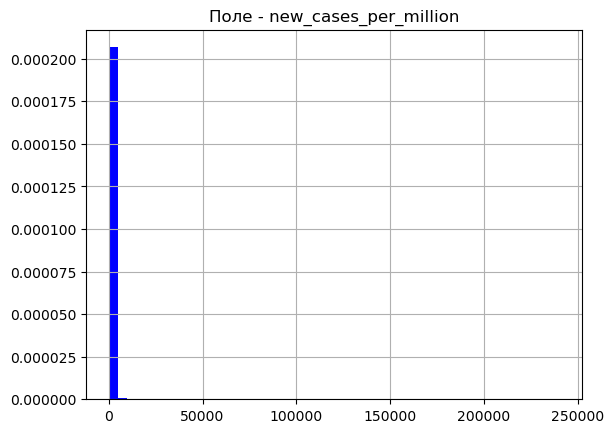

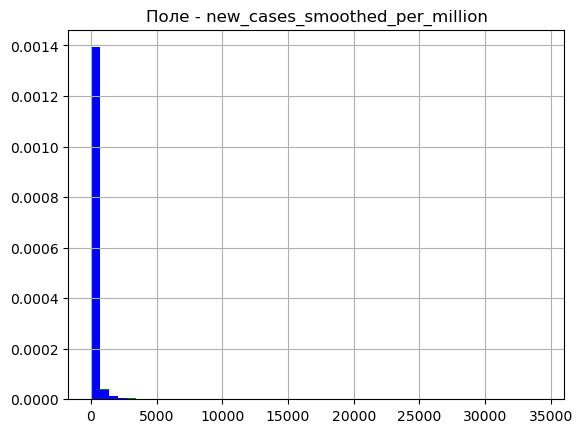

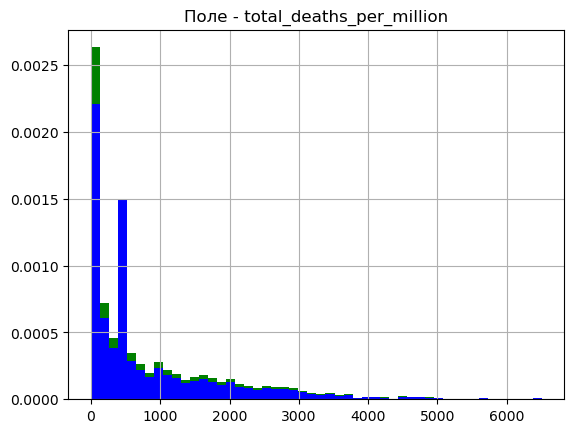

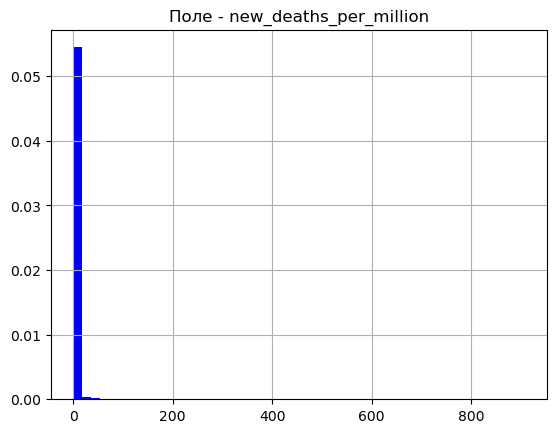

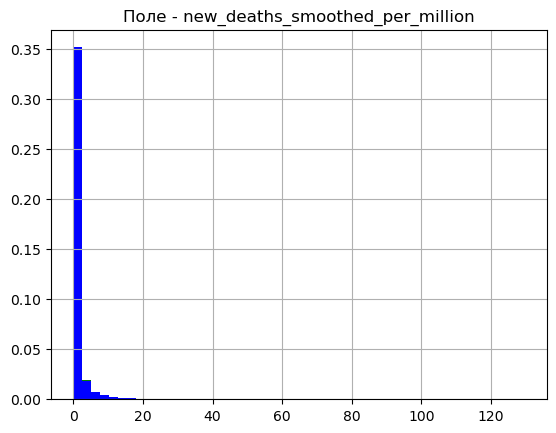

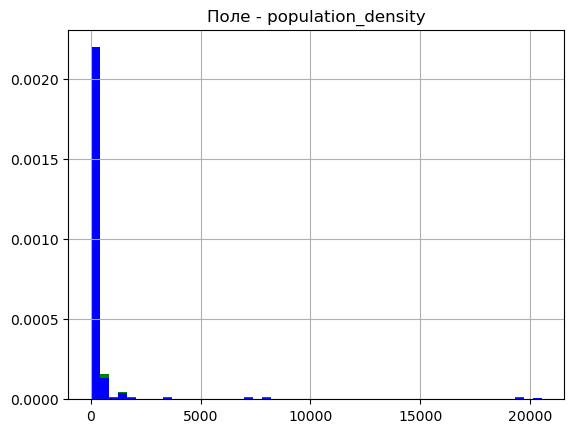

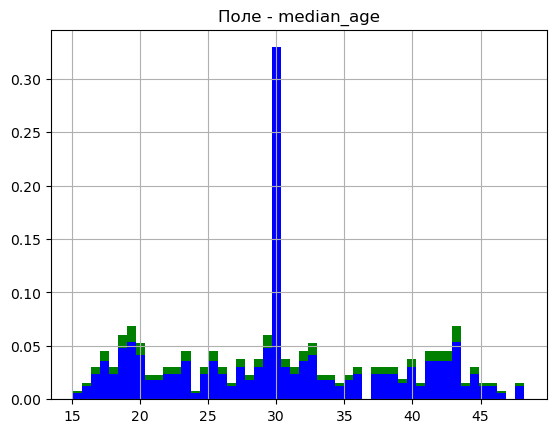

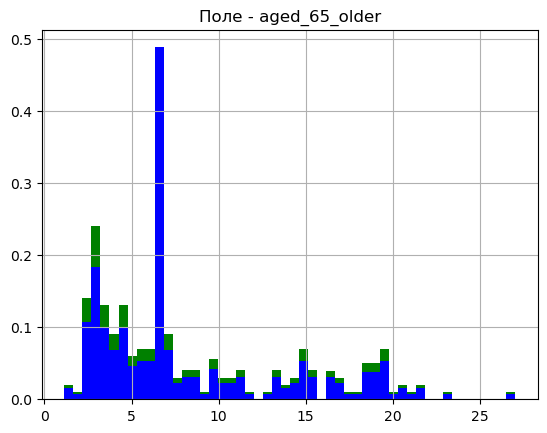

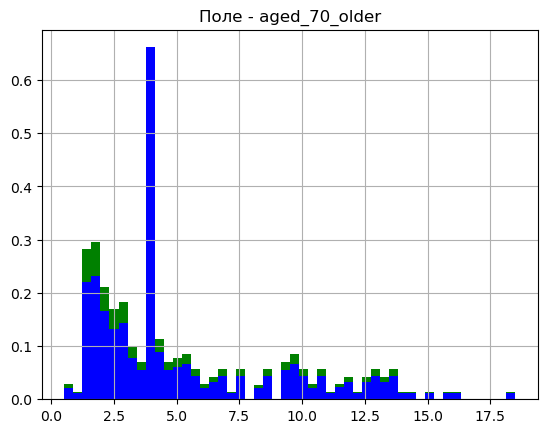

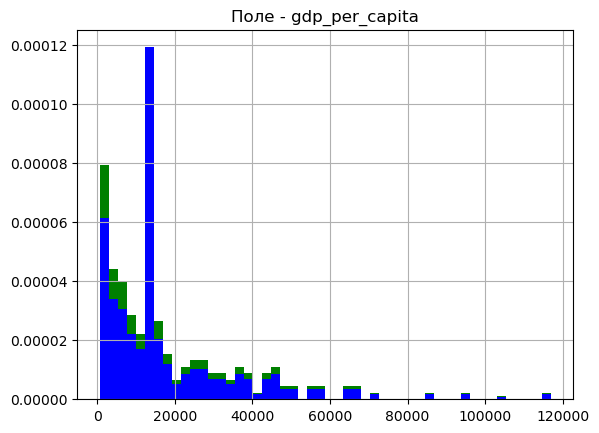

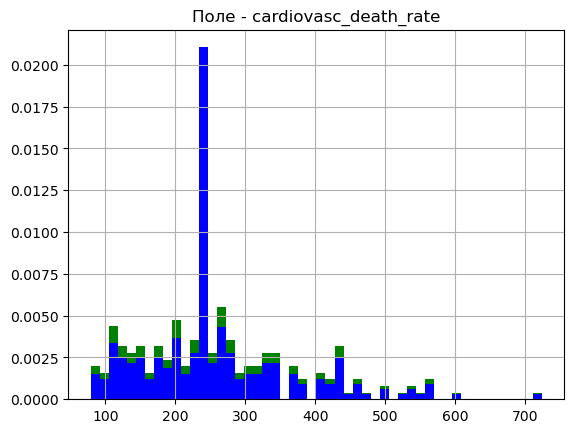

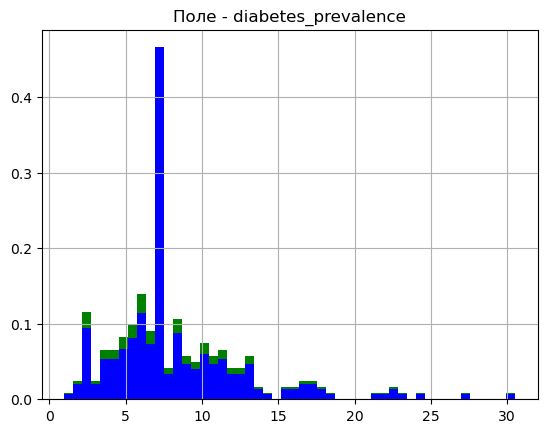

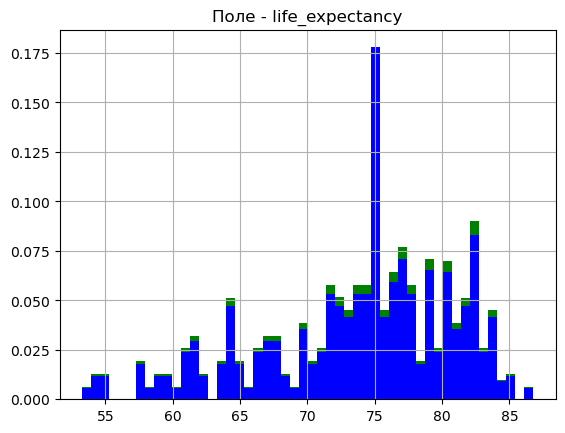

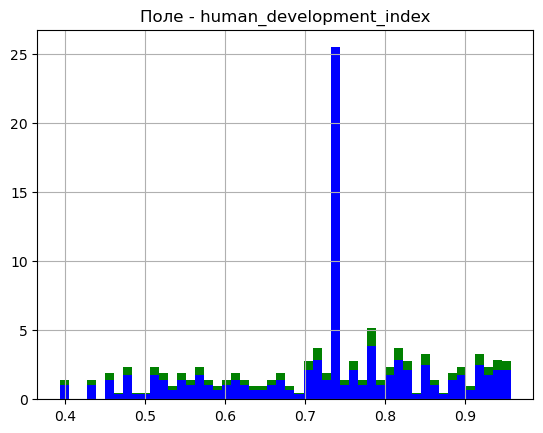

In [15]:
plot_hist_diff(data2, data2_drop, hcols_with_na)

#### Преобразование категориальных признаков в числовые

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le1 = LabelEncoder()
data2_drop["continent"] = le1.fit_transform(data2_drop["continent"].astype('str'))

In [23]:
le2 = LabelEncoder()
data2_drop["location"] = le2.fit_transform(data2_drop["location"].astype('str'))

In [24]:
data2_drop.head(2000)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,population
0,AFG,1,0,2020-01-05,78205.0,0.0,18.143,1380.0,0.0,0.143,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,4.112877e+07
1,AFG,1,0,2020-01-06,78205.0,0.0,18.143,1380.0,0.0,0.143,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,4.112877e+07
2,AFG,1,0,2020-01-07,78205.0,0.0,18.143,1380.0,0.0,0.143,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,4.112877e+07
3,AFG,1,0,2020-01-08,78205.0,0.0,18.143,1380.0,0.0,0.143,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,4.112877e+07
4,AFG,1,0,2020-01-09,78205.0,0.0,18.143,1380.0,0.0,0.143,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,4.112877e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,OWID_AFR,0,1,2021-05-08,4617579.0,0.0,9762.714,122490.0,0.0,314.714,...,90.672,29.7,6.378,3.871,12294.876,245.465,7.21,75.05,0.740,1.426737e+09
1996,OWID_AFR,0,1,2021-05-09,4676802.0,59223.0,8460.429,124612.0,2122.0,303.143,...,90.672,29.7,6.378,3.871,12294.876,245.465,7.21,75.05,0.740,1.426737e+09
1997,OWID_AFR,0,1,2021-05-10,4676802.0,0.0,8460.429,124612.0,0.0,303.143,...,90.672,29.7,6.378,3.871,12294.876,245.465,7.21,75.05,0.740,1.426737e+09
1998,OWID_AFR,0,1,2021-05-11,4676802.0,0.0,8460.429,124612.0,0.0,303.143,...,90.672,29.7,6.378,3.871,12294.876,245.465,7.21,75.05,0.740,1.426737e+09


In [20]:
le2.classes_

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [25]:
le3 = LabelEncoder()
data2_drop["iso_code"] = le3.fit_transform(data2_drop["iso_code"].astype('str'))

In [26]:
le3.classes_

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES',
       'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL',
       'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU',
       'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH',
       'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM',
       'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX',
       'LVA', 'MAC',

In [27]:
data2_drop['Date'] = pd.to_datetime(data2_drop['date'],format='%Y-%m-%d')

In [28]:
data2_drop = data2_drop.drop(['date'], axis = 1)

In [29]:
data3 = data2_drop.copy(deep=True)

In [30]:
data3.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,population,Date
0,1,1,0,78205.0,0.0,18.143,1380.0,0.0,0.143,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-05
1,1,1,0,78205.0,0.0,18.143,1380.0,0.0,0.143,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-06
2,1,1,0,78205.0,0.0,18.143,1380.0,0.0,0.143,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-07
3,1,1,0,78205.0,0.0,18.143,1380.0,0.0,0.143,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-08
4,1,1,0,78205.0,0.0,18.143,1380.0,0.0,0.143,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-09
5,1,1,0,78205.0,0.0,0.000,1380.0,0.0,0.000,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-10
6,1,1,0,78205.0,0.0,0.000,1380.0,0.0,0.000,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-11
7,1,1,0,78205.0,0.0,0.000,1380.0,0.0,0.000,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-12
8,1,1,0,78205.0,0.0,0.000,1380.0,0.0,0.000,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-13
9,1,1,0,78205.0,0.0,0.000,1380.0,0.0,0.000,32037.822,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-14


In [27]:
data2_drop.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,population,Date
0,1,1,0,75258.0,0.0,20.429,1364.0,0.0,0.143,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-05
1,1,1,0,75258.0,0.0,20.429,1364.0,0.0,0.143,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-06
2,1,1,0,75258.0,0.0,20.429,1364.0,0.0,0.143,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-07
3,1,1,0,75258.0,0.0,20.429,1364.0,0.0,0.143,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-08
4,1,1,0,75258.0,0.0,20.429,1364.0,0.0,0.143,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-09
5,1,1,0,75258.0,0.0,0.000,1364.0,0.0,0.000,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-10
6,1,1,0,75258.0,0.0,0.000,1364.0,0.0,0.000,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-11
7,1,1,0,75258.0,0.0,0.000,1364.0,0.0,0.000,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-12
8,1,1,0,75258.0,0.0,0.000,1364.0,0.0,0.000,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-13
9,1,1,0,75258.0,0.0,0.000,1364.0,0.0,0.000,31531.022,...,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-14


#### Отбор значимых признаков

VarianceThreshold Селектор функций, который удаляет все функции с низкой дисперсией. Функции с дисперсией тренировочного набора ниже порога будут удалены.

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [32]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data3.drop(['Date'], axis = 1))
# Значения дисперсий для каждого признака
selector.variances_

array([5.44415563e+03, 1.61413811e+01, 5.39142437e+03, 1.69747755e+15,
       5.68107422e+10, 8.05201749e+09, 1.73867875e+11, 2.00795221e+06,
       2.81732633e+05, 2.31311166e+10, 2.35817215e+06, 3.22130443e+05,
       1.09875967e+06, 5.28161904e+01, 6.97179015e+00, 2.81408748e+06,
       6.53129574e+01, 2.93513945e+01, 1.38534738e+01, 3.14381774e+08,
       1.14033559e+04, 2.01856194e+01, 5.04721628e+01, 1.67678630e-02,
       4.41464309e+17])

In [33]:
data2_drop.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index', 'population', 'Date'],
      dtype='object')

In [34]:
data3.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index', 'population', 'Date'],
      dtype='object')

In [35]:
col = ['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy', 'population']
data3 = pd.DataFrame(selector.transform(data2_drop.drop(['Date'], axis = 1)), columns=col)

In [36]:
data3.shape

(380574, 24)

### Методы, основанные на корреляции

- Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
- Важно, чтобы признаки не коррелировали между собой.

Коэффициент корреляции (удаляются признаки, у которых коэффициент корреляции больше порогового). Этот алгоритм выбора функций рассматривает только функции (X), а не желаемые результаты (y), и поэтому может использоваться для обучения без учителя.

In [37]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [38]:
make_corr_df(data3)

,f1,f2,corr
0,aged_70_older,aged_65_older,0.971149
1,aged_65_older,aged_70_older,0.971149
2,total_cases,total_deaths,0.941757
3,total_deaths,total_cases,0.941757
4,median_age,aged_70_older,0.880573
5,aged_70_older,median_age,0.880573
6,median_age,aged_65_older,0.880385
7,aged_65_older,median_age,0.880385
8,location,iso_code,0.826565
9,iso_code,location,0.826565


In [39]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [40]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data3))

[['aged_65_older', 'median_age', 'aged_70_older'],
 ['total_deaths', 'total_cases'],
 ['iso_code', 'location']]

In [41]:
data3 = data2_drop.drop(['median_age', 'aged_70_older', 'new_cases_smoothed', 'new_deaths_smoothed', 'iso_code'], axis = 1)

In [42]:
data3.shape

(380574, 21)

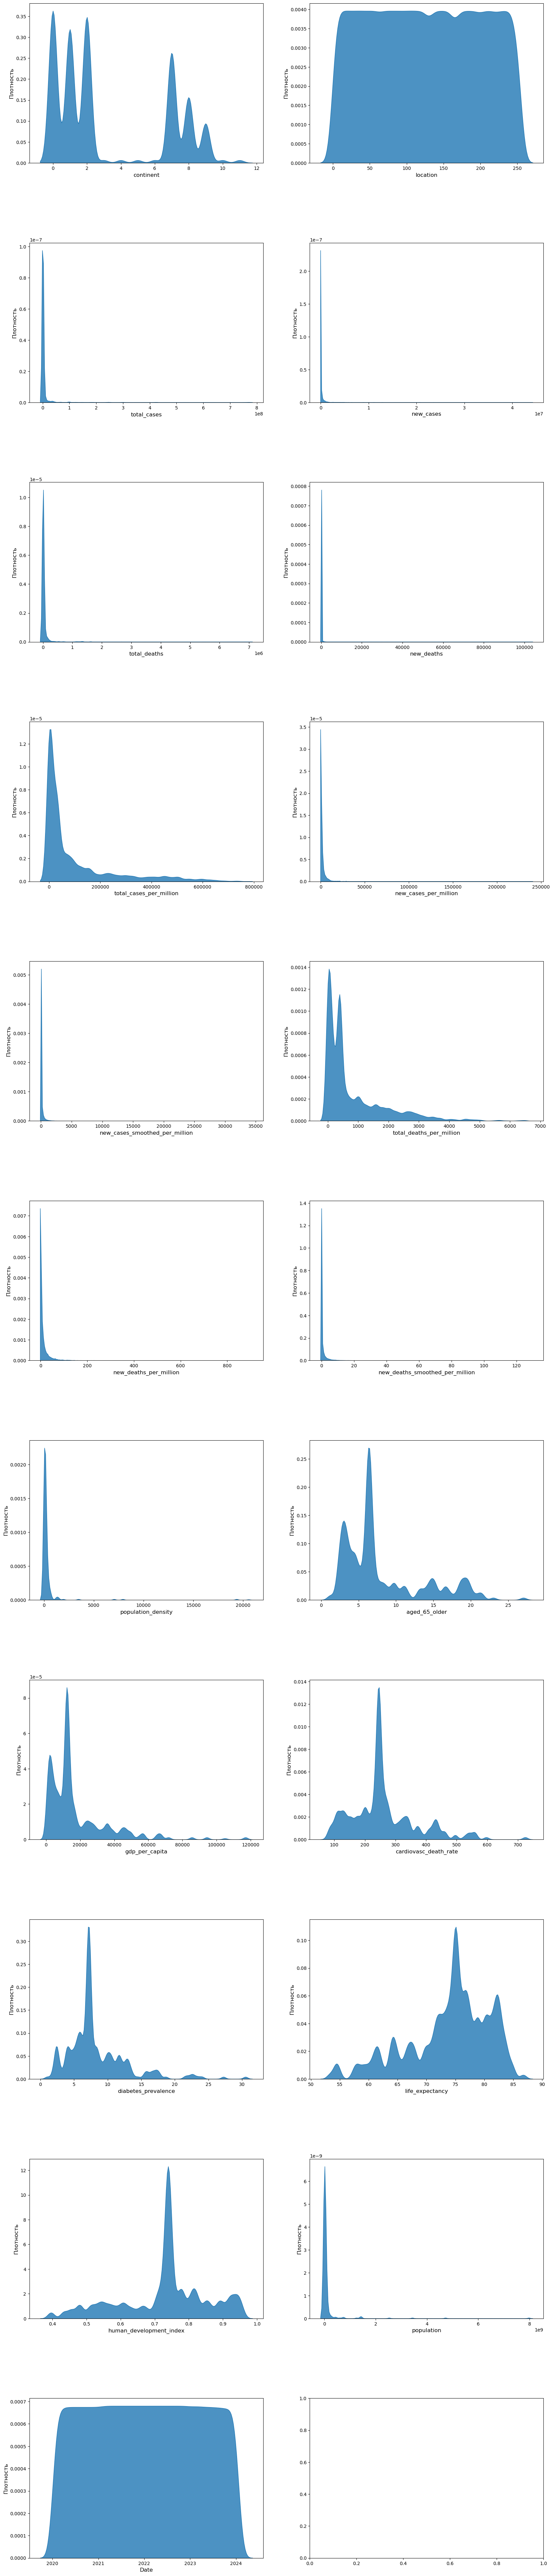

In [43]:
# Создаем матрицу графиков для визуализации распредления по каждому признаку
fig, axes = plt.subplots(11, 2, figsize=(20, 100))
# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)
# Список значений признаков для цикла
columns = data3.columns
# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):    
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = data3, x = column,fill = True, alpha = 0.8, ax = ax)    
    ax.set_xlabel(column, fontsize = 12)
    ax.set_ylabel('Плотность', fontsize = 12)    
plt.show()

Можно заметить что несколько атрибутов вывелись неправильно (значения 1e-5), скорее всего это из-за NaN значении в атрибутах. В предобработке их нужно будет учесть. Так же видно что некоторые атрибуты имеют отрицательные значения, которых не должно быть, например кол-во курящих женщин. Ещё видно резкие скачки в некоторых атрибутах, что тоже довольно интересно, возможно это выбросы.

Судя по предоставленной тепловой карте, нулевым значениям и плотности, следующие характеристики оказывают большее влияние на эпидемиологическую ситуацию и туристическую безопасность:

total_cases

new_cases

total_deaths

new_deaths

total_cases_per_million

new_cases_per_million

total_deaths_per_million

new_deaths_per_million

reproduction_rate

icu_patients_per_million

hosp_patients_per_million

total_tests_per_thousand

new_tests_per_thousand

positive_rate

total_vaccinations_per_hundred

people_vaccinated_per_hundred

people_fully_vaccinated_per_hundred

total_boosters_per_hundred

new_vaccinations_smoothed_per_million

new_people_vaccinated_smoothed_per_hundred

stringency_index

population_density

median_age

aged_65_older

aged_70_older

hospital_beds_per_thousand

life_expectancy

Мы можем исключить следующие атрибуты из-за низкого влияния или высокой корреляции с другими атрибутами:

iso_code

continent (при обучении)

location (при обучении)

date (при обучении)

new_cases_smoothed

new_cases_smoothed_per_million

new_deaths_smoothed

new_deaths_smoothed_per_million

new_tests

new_tests_smoothed

new_tests_smoothed_per_thousand

tests_per_case

tests_units

total_vaccinations

people_vaccinated

people_fully_vaccinated

total_boosters

new_vaccinations

new_people_vaccinated_smoothed

new_people_vaccinated_smoothed_per_hundred

excess_mortality_cumulative_absolute

excess_mortality_cumulative

excess_mortality

excess_mortality_cumulative_per_million

human_development_index

population

extreme_poverty

cardiovasc_death_rate

diabetes_prevalence

female_smokers

male_smokers

handwashing_facilities

Выбор атрибутов, таких как плотность населения, средний возраст и наличие больничных коек, может быть оправдан их потенциальным влиянием на распространение заболевания и способность системы здравоохранения справиться с ним. Исключение определенных атрибутов, таких как iso_code и континент, позволяет нам сосредоточиться на эпидемиологических аспектах набора данных, избегая при этом потенциальных ошибок, связанных с геополитическими факторами. Столбцы даты, локации и континента никак не влияют на обучение, но они нам пригодяться в будущем, так что удалять их не будем.

## 1.3 Описание структуры набора данных

### _Подтвержденные случаи заболевания_
**total_cases** - Всего подтвержденных случаев COVID-19. Подсчеты могут включать вероятные случаи, если о них сообщалось.

**new_cases** - Новые подтвержденные случаи Covid-19. Подсчеты могут включать вероятные случаи, если о них сообщалось. В редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем для этого показателя значение NA.

**new_cases_smoothed** - Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней). Подсчеты могут включать вероятные случаи, если о них сообщалось.

**total_cases_per_million** - Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, если о них сообщалось.

**new_cases_per_million** - Новые подтвержденные случаи COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, если о них сообщалось.

**new_cases_smoothed_per_million** - Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи, если о них сообщалось.

### _Подтвержденные случаи смерти_
**total_deaths** - Всего смертей от Covid-19. Подсчеты могут включать вероятные случаи смерти, если об этом сообщается.

**new_deaths** - Новые случаи смерти от Covid-19. Подсчеты могут включать вероятные случаи смерти, если об этом сообщается. В редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем для этого показателя значение NA.

**new_deaths_smoothed**	- Новые случаи смерти, связанные с COVID-19 (сглаженные за 7 дней). Подсчеты могут включать вероятные случаи смерти, если об этом сообщается.

**total_deaths_per_million** - Общее количество смертей от Covid-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если об этом сообщается.

**new_deaths_per_million** - Новые случаи смерти от Covid-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если об этом сообщается.

**new_deaths_smoothed_per_million**	- Новые случаи смерти от COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если об этом сообщается.

### _Повышенная смертность_
**excess_mortality** - Процентная разница между зарегистрированным количеством смертей за неделю или месяц в 2020–2021 годах и прогнозируемым количеством смертей за тот же период на основе предыдущих лет.

**excess_mortality_cumulative**	- Процентная разница между совокупным числом смертей с 1 января 2020 года и совокупным прогнозируемым числом смертей за тот же период на основе предыдущих лет.

**excess_mortality_cumulative_absolute** - Кумулятивная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет.

**excess_mortality_cumulative_per_million** - Кумулятивная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет, на миллион человек.

### _Больница и отделение интенсивной терапии_
**icu_patients** - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в определенный день

**icu_patients_per_million** - Число пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в определенный день на 1 000 000 человек

**hosp_patients** - Количество пациентов с COVID-19, находящихся в больнице в определенный день

**hosp_patients_per_million** - Число пациентов с COVID-19, находящихся в больнице в определенный день на 1 000 000 человек

**weekly_icu_admissions** - Число пациентов с COVID-19, впервые поступивших в отделения интенсивной терапии (ОИТ) за данную неделю (отчетная дата и предшествующие 6 дней)

**weekly_icu_admissions_per_million** - Число пациентов с COVID-19, впервые поступивших в отделения интенсивной терапии (ОИТ) за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

**weekly_hosp_admissions** - Число пациентов с COVID-19, впервые поступивших в больницы за данную неделю (отчетная дата и предыдущие 6 дней)

**weekly_hosp_admissions_per_million** - Число пациентов с COVID-19, впервые поступивших в больницы за данную неделю, на 1 000 000 человек (отчетная дата и предыдущие 6 дней)

### _Ответные меры политики_
**stringency_index** - Индекс строгости мер реагирования правительства: комплексный показатель, основанный на 9 индикаторах реагирования, включая закрытие школ, рабочих мест и запреты на поездки, масштабированный до значения от 0 до 100 (100 = самый строгий ответ).

### _Скорость воспроизводства_
**reproduction_rate** - Оценка эффективной скорости воспроизводства (R) COVID-19 в реальном времени.

### _Тесты_
**total_tests**	- Всего тестов на COVID-19

**new_tests** - Новые тесты на COVID-19 (рассчитываются только за последовательные дни)

**total_tests_per_thousand** - Всего тестов на COVID-19 на 1000 человек

**new_tests_per_thousand** - Новые тесты на COVID-19 на 1000 человек

**new_tests_smoothed** - Новые тесты на COVID-19 (сглаженные за 7 дней). Для стран, которые не сообщают данные о тестировании ежедневно, мы предполагаем, что тестирование менялось одинаково ежедневно в течение всех периодов, в течение которых данные не сообщались. В результате получается полная серия ежедневных показателей, которые затем усредняются за скользящий 7-дневный период.

**new_tests_smoothed_per_thousand**	- Новые тесты на COVID-19 (сглаженные за 7 дней) на 1000 человек

**positive_rate** - Доля положительных тестов на COVID-19, выраженная как скользящее среднее за 7 дней (это обратное значение test_per_case).

**tests_per_case** - Тесты, проведенные на каждый новый подтвержденный случай COVID-19, выраженный как скользящее среднее значение за 7 дней (это обратное значение положительного_рейта)

**tests_units** - Единицы измерения, используемые местоположением для отчета о данных тестирования. Файл страны не может содержать смешанные единицы. Все метрики, касающиеся данных тестирования, используют указанный тестовый блок. Допустимыми единицами измерения являются «протестированные люди» (количество протестированных людей), «проведенные тесты» (количество проведенных тестов. Один человек может проходить тестирование более одного раза в течение определенного дня) и «протестированные образцы» (количество протестированных образцов. В в некоторых случаях для проведения данного испытания может потребоваться более одного образца.)

### _Прививки_
**total_vaccinations** - Общее количество введенных доз вакцины против COVID-19

**people_vaccinated** - Общее количество людей, получивших хотя бы одну дозу вакцины

**people_fully_vaccinated** - Общее количество людей, получивших все дозы, предусмотренные протоколом первоначальной вакцинации

**total_boosters** - Общее количество введенных бустерных доз вакцинации против COVID-19 (введенных доз сверх количества, предусмотренного протоколом вакцинации)

**new_vaccinations** - Введены новые дозы вакцинации против COVID-19 (рассчитываются только для последовательных дней)

**new_vaccinations_smoothed** - Введены новые дозы вакцинации против COVID-19 (сглаженные за 7 дней). Для стран, которые не сообщают данные о вакцинации ежедневно, мы предполагаем, что уровень вакцинации менялся одинаково ежедневно в течение всех периодов, в течение которых данные не поступали. В результате получается полная серия ежедневных показателей, которые затем усредняются за скользящий 7-дневный период.

**total_vaccinations_per_hundred** - Общее количество введенных доз вакцины против COVID-19 на 100 человек в общей численности населения

**people_vaccinated_per_hundred** - Общее количество людей, получивших хотя бы одну дозу вакцины, на 100 человек общей численности населения

**people_fully_vaccinated_per_hundred** - Общее количество людей, получивших все дозы, предусмотренные протоколом первичной вакцинации, на 100 человек общей численности населения

**total_boosters_per_hundred** - Общее количество введенных бустерных доз вакцинации против COVID-19 на 100 человек в общей численности населения

**new_vaccinations_smoothed_per_million** - Введены новые дозы вакцинации против COVID-19 (сглаженные за 7 дней) на 1 000 000 человек в общей численности населения

**new_people_vaccinated_smoothed** - Ежедневное количество людей, получающих первую дозу вакцины (сглаженное за 7 дней)

**new_people_vaccinated_smoothed_per_hundred** - Ежедневное количество людей, получающих первую дозу вакцины (сглаженная за 7 дней) на 100 человек в общей численности населения

### _Другие_
**iso_code** - ISO 3166-1 альфа-3 – трехбуквенные коды стран. Обратите внимание, что регионы, определенные OWID (например, континенты, такие как «Европа»), содержат префикс «OWID_».

**continent** - Континент географического положения

**location** - Географическое положение

**date** - Дата наблюдения

**population** - Население (последние доступные значения).

**population_density** - Число людей, разделенное на площадь суши, в квадратных километрах, за последний год, по которому имеются данные.

**median_age** - Средний возраст населения, прогноз ООН на 2020 год.

**aged_65_older** - Доля населения в возрасте 65 лет и старше, данные за последний год

**aged_70_older** - Доля населения в возрасте 70 лет и старше в 2015 г.

**gdp_per_capita** - Валовой внутренний продукт по паритету покупательной способности (в постоянных международных долларах 2011 года), данные за последний год

**extreme_poverty**	- Доля населения, живущего в крайней нищете, данные за последний год, начиная с 2010 г.

**cardiovasc_death_rate** - Смертность от сердечно-сосудистых заболеваний в 2017 г. (годовое число смертей на 100 000 человек)

**diabetes_prevalence** - Распространенность диабета (% населения в возрасте от 20 до 79 лет) в 2017 г.

**female_smokers** - Доля курящих женщин, доступные за последний год

**male_smokers** - Доля курящих мужчин, доступные за последний год

**handwashing_facilities** - Доля населения, имеющего в помещениях базовые приспособления для мытья рук, данные за последний год, доступные

**hospital_beds_per_thousand** - Больничные койки на 1000 человек, последний год, доступный с 2010 г.

**life_expectancy**	- Ожидаемая продолжительность жизни при рождении в 2019 году

**human_development_index**	- Составной индекс, измеряющий средние достижения по трем основным измерениям человеческого развития — долгой и здоровой жизни, знаниям и достойному уровню жизни. Значения за 2019 год

### Нормальность распределения данных в атрибутах

Есть три распространенных способа проверить нормальность распределения данных в Python:

1. (Визуальный метод) Создайте гистограмму.

Если гистограмма имеет форму колокола, то считается, что данные распределены нормально.

2. (Визуальный метод) Создайте график QQ.

Если точки на графике примерно совпадают с прямой диагональной линией, предполагается, что данные распределены нормально.

3. (Формальный статистический тест) Выполните тест Шапиро-Уилка.

Если p-значение теста больше, чем α = 0,05, то предполагается, что данные распределены нормально.

In [44]:
# Библиотеки для опеределения нормальности распределения данных
import scipy.stats as stats
import statsmodels.api as sm

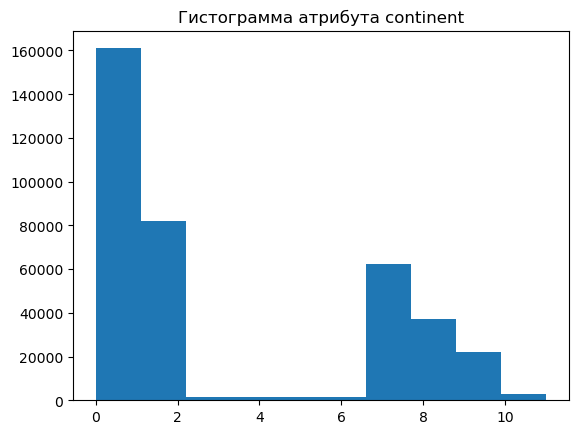

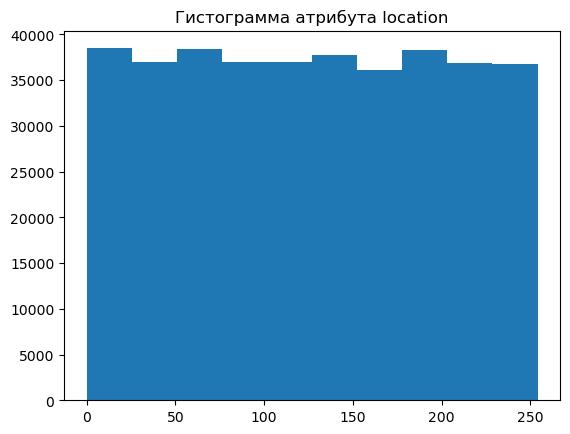

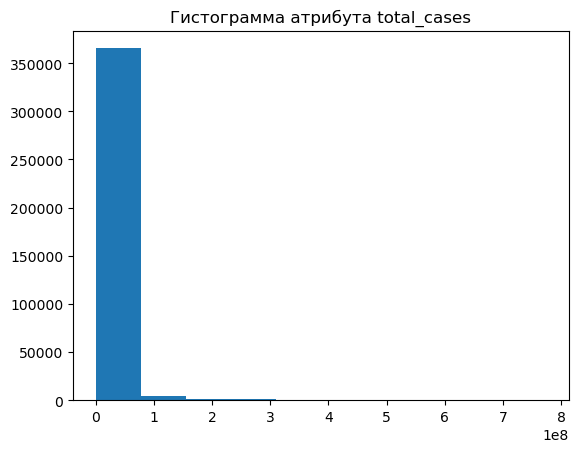

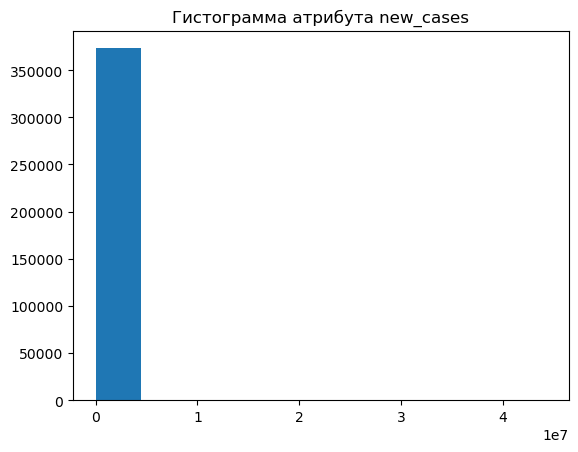

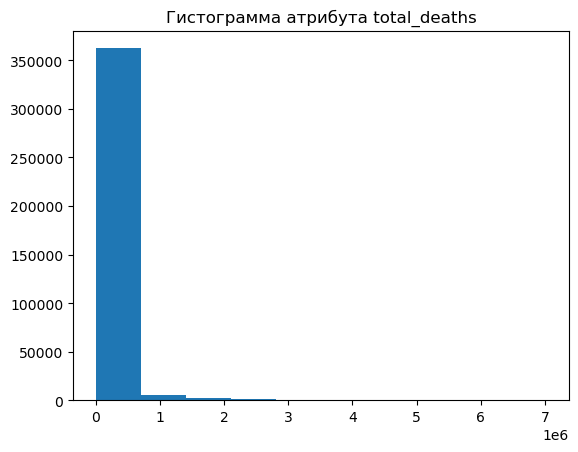

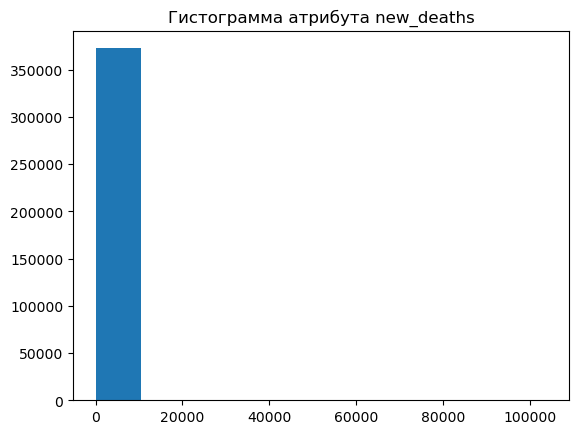

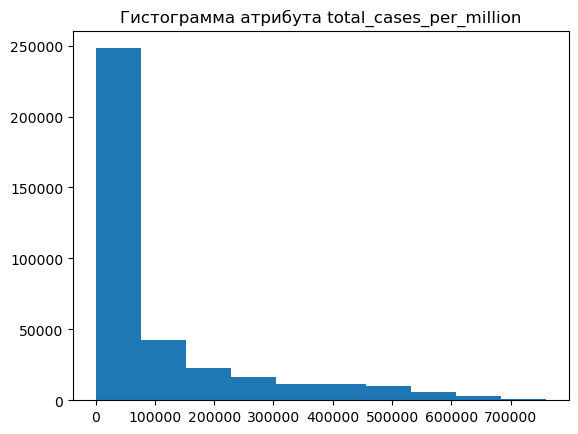

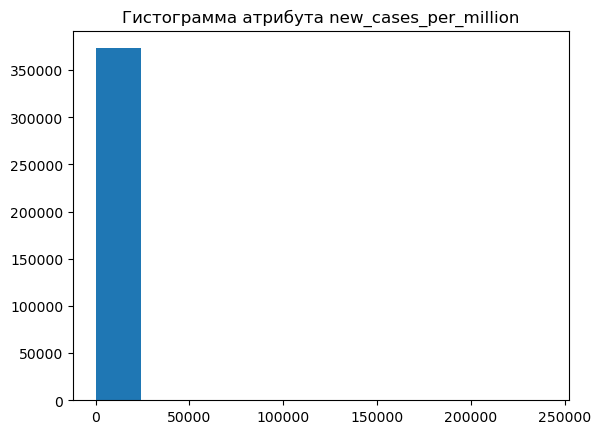

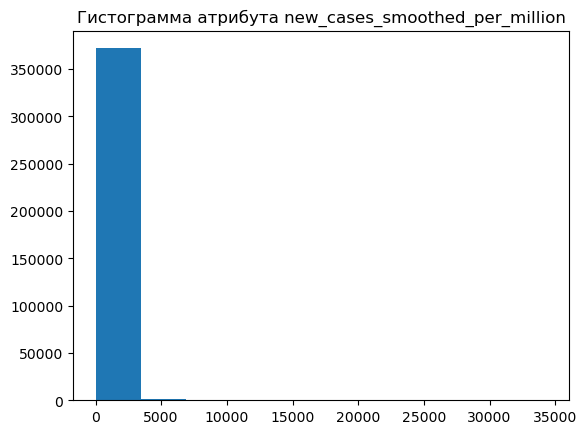

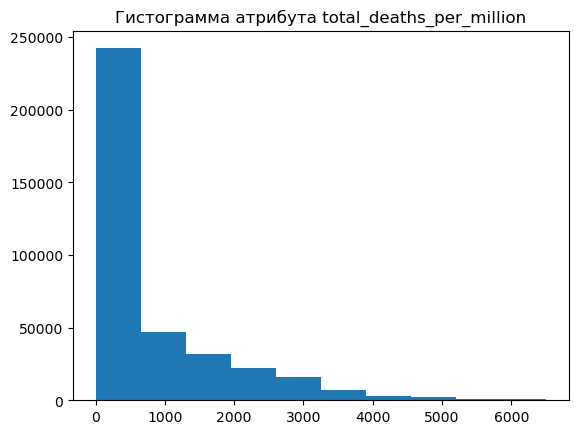

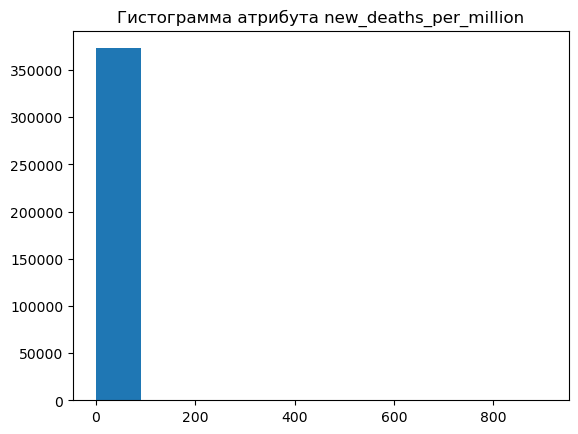

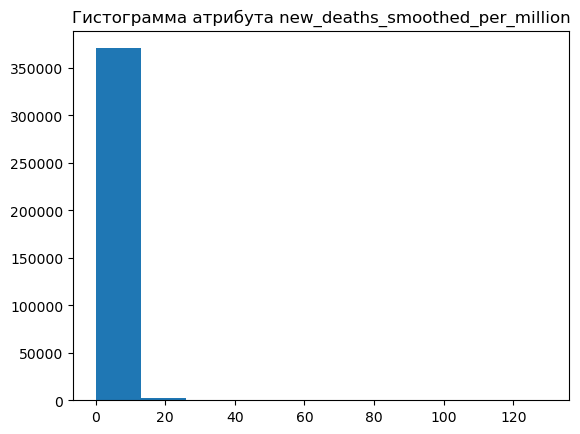

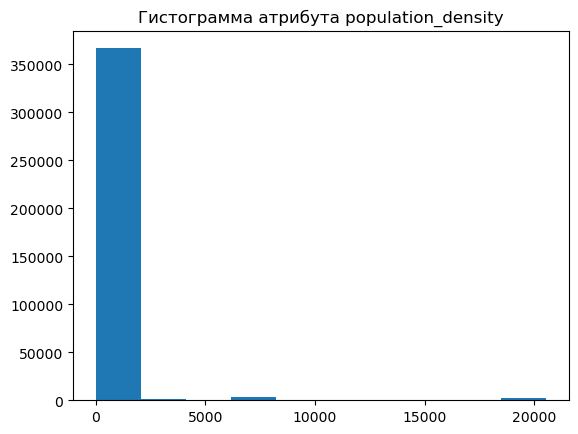

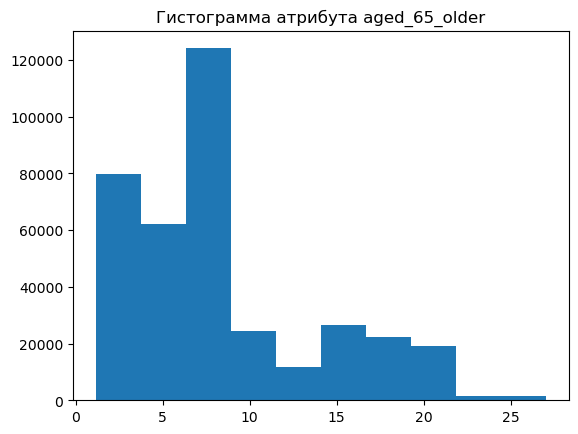

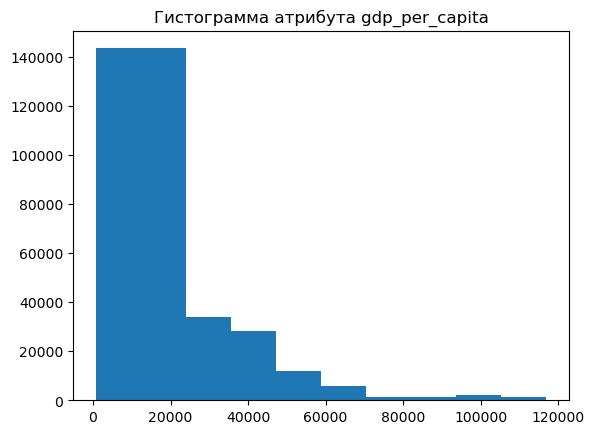

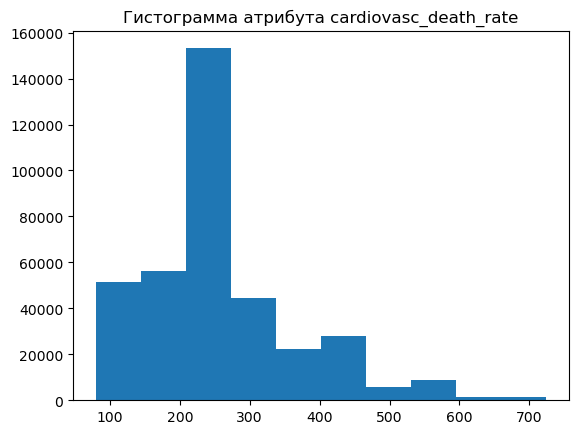

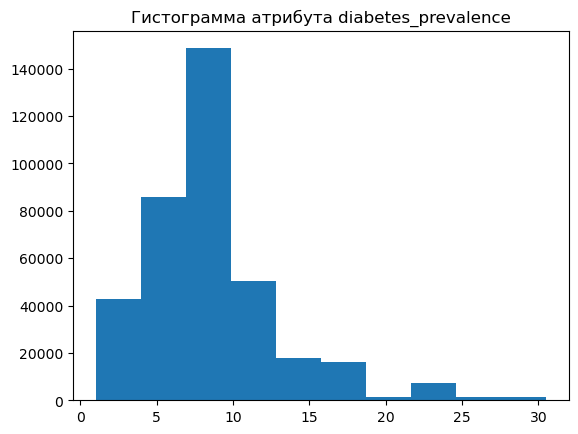

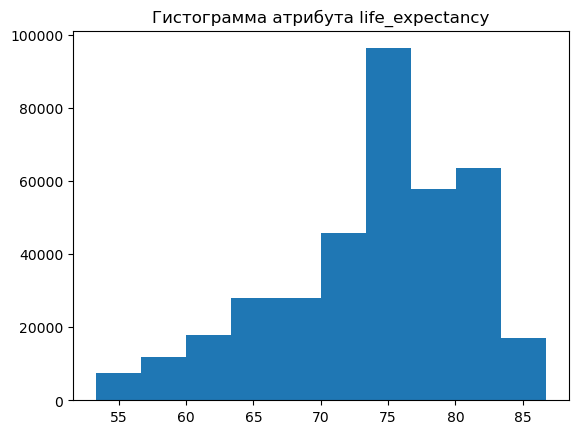

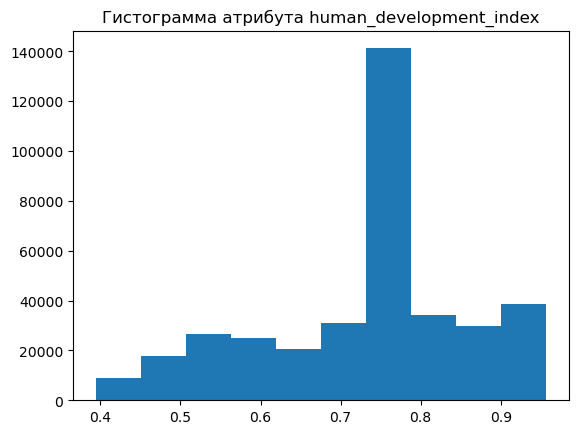

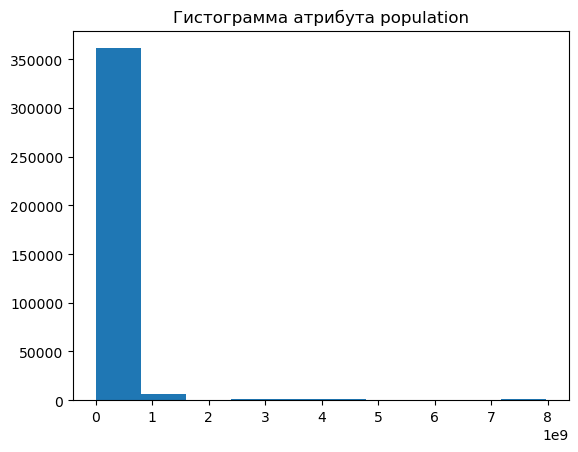

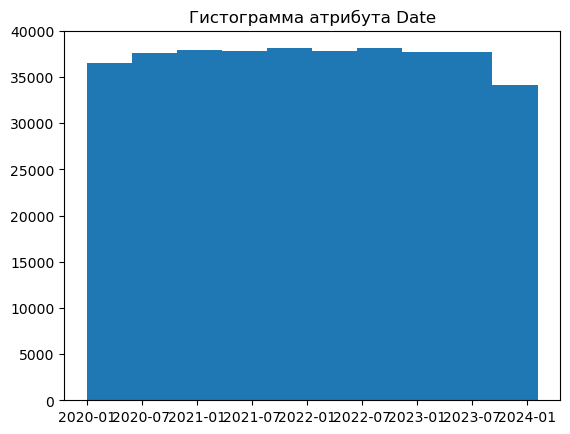

In [45]:
# Проверка распределения значений по каждому атрибуту используя гистограммы
for attribute in data3.columns:
    # Создание гистограммы атрибута
    plt.hist(data3[attribute])
    plt.title(f'Гистограмма атрибута {attribute}')
    plt.show()
    

## 1.4 Формирование дополнительных атрибутов

Коэффициент распространения коронавируса (Rt) - это показатель, определяющий среднее количество людей, которых инфицирует один больной до его изоляции. Он рассчитывается на основе данных по приросту новых случаев за последние 8 суток. Коэффициент распространения коронавируса используется для принятия решений о переходе к первому, второму или третьему этапу снятия ограничений.

In [43]:
data3['RT']= 0.0

In [44]:
data3.head()

,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,population,Date,RT
0,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-05,0.0
1,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-06,0.0
2,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-07,0.0
3,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-08,0.0
4,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-09,0.0


In [45]:
%%time
for i in range(len(data3)-8):
    loc = data3['location'][i]
    if(data3['location'][i+8] == loc):
        data3['RT'][i+8] = (data3['total_cases'][i+7]+data3['total_cases'][i+6]+data3['total_cases'][i+5]+data3['total_cases'][i+4])/(data3['total_cases'][i+3]+data3['total_cases'][i+2]+data3['total_cases'][i+1]+data3['total_cases'][i])
    else:
        for j in range(8):
            data3['RT'][i] = 0
            i += 1

CPU times: total: 1min 33s
Wall time: 1min 33s


In [46]:
data3.head(100)

,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,population,Date,RT
0,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.000,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-05,0.000000
1,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.000,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-06,0.000000
2,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.000,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-07,0.000000
3,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.000,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-08,0.000000
4,1,0,78205.0,0.0,1380.0,0.0,32037.822,0.000,4.5945,407.439,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-01-09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,274.0,0.0,5.0,0.0,6.662,0.000,0.6360,0.122,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-04-09,3.010989
96,1,0,274.0,0.0,5.0,0.0,6.662,0.000,0.6360,0.122,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-04-10,2.003656
97,1,0,274.0,0.0,5.0,0.0,6.662,0.000,0.6360,0.122,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-04-11,1.501370
98,1,0,521.0,247.0,15.0,10.0,12.668,6.006,0.8580,0.365,...,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,2020-04-12,1.200438


Для принятия решения о поэтапном снятии ограничений в регионах коэффициент распространения коронавируса используется наряду с данными о свободном коечным фондом и показателем тестирования на 100 тыс. населения. Одно из условий перехода к первому этапу снятия режима самоизоляции - это снижение показателя Rt ниже единицы.

Простыми словами, коэффициент распространения коронавируса показывает, сколько человек в среднем успевает заразить один инфицированный до его изоляции. Согласно рекомендациям Роспотребнадзора, регионы, где показатель Rt равен или меньше 1, могут приступать к смягчению ограничительных мер из-за коронавируса. Если коэффициент снижается до 0,8 и менее, регион может перейти ко второму этапу, при значении 0,5 и менее - к третьему.

## 1.5 Кластеризация набора данных

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

Удалим некоторые атрибуты из датасета для обучения моделей и кластеризации

In [49]:
data_date = data3['Date']
data_location = data3['location']
data = data3.drop(['Date','continent','location'], axis = 1)
data.head()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,population,RT
0,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,0.0,0.001,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,0.0
1,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,0.0,0.001,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,0.0
2,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,0.0,0.001,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,0.0
3,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,0.0,0.001,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,0.0
4,78205.0,0.0,1380.0,0.0,32037.822,0.0,4.5945,407.439,0.0,0.001,54.422,2.581,1803.987,597.029,9.59,64.83,0.511,41128772.0,0.0


In [50]:
# Скалирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
X_scale = scaler.transform(data)
scaled_data = pd.DataFrame(X_scale, columns=data.columns)

In [52]:
# Уменьшение размерности датафрейма до 2-х измерений
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
np.shape(x_pca)

(380574, 2)

Найдём наилучшее кол-во кластеров через метод локтя.

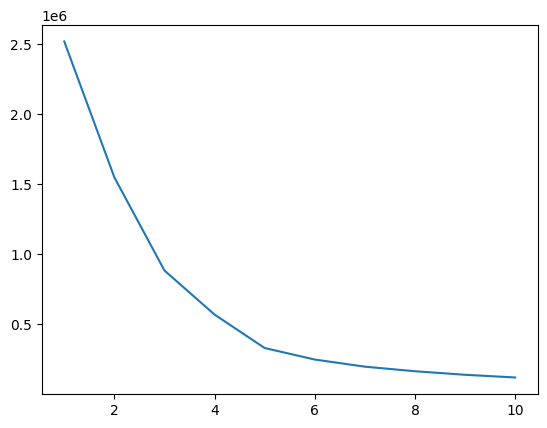

In [55]:
from sklearn.cluster import KMeans
wgcc = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmean.fit(x_pca)
    wgcc.append(kmean.inertia_)
plt.plot(range(1,11), wgcc);

## Кластеризация

Будут использоваться такие модели кластеризации как Kmeans, Birch и GaussianMixture, так как позволяют работать с большими объемами данных и выбирать количество кластеров.

__kmeans__ разбивает множество элементов векторного пространства на заранее известное число кластеров k.

Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике

__Birch__ - это алгоритм интеллектуального анализа данных без учителя, используемый для осуществления иерархической кластеризации на наборах данных большого размера. Преимуществом BIRCH является возможность метода динамически кластеризовать по мере поступления многомерных метрических точек данных в попытке получить кластеризацию лучшего качества для имеющегося набора ресурсов.

__GaussianMixture__ - Модель смеси Гаусса (GMM) пытается найти смесь многомерных гауссовских распределений вероятностей, которые лучше всего моделируют любой входной набор данных. В простейшем случае ГММ могут использоваться для поиска кластеров таким же образом, как k-средние

### K-means++

In [56]:
# Получение распределения от kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
label = kmeans.fit_predict(x_pca)

Text(0, 0.5, 'Second Principal Component')

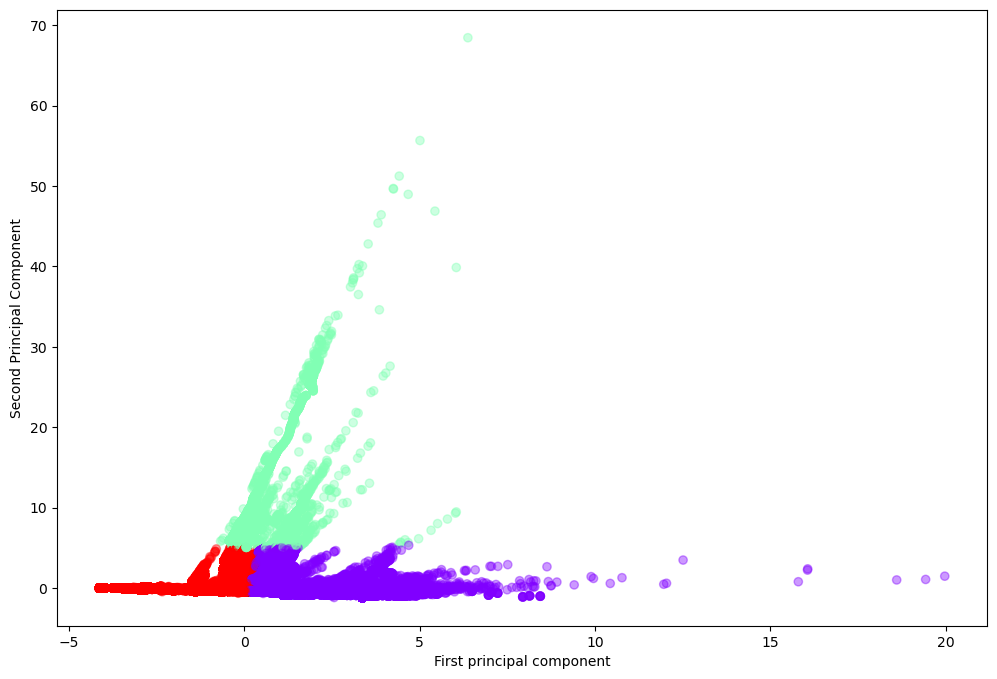

In [49]:
# График распределения кластеров в kmeans
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
# Просмотр того, как распределились данные 
label = pd.Series(label)
label.value_counts()

0    206661
1    167786
2      6127
dtype: int64

### Birch

In [58]:
# Получение распределения от Birch
from sklearn.cluster import Birch

brc = Birch(n_clusters=3)
brc.fit(x_pca)

label2 = brc.predict(x_pca)

Text(0, 0.5, 'Second Principal Component')

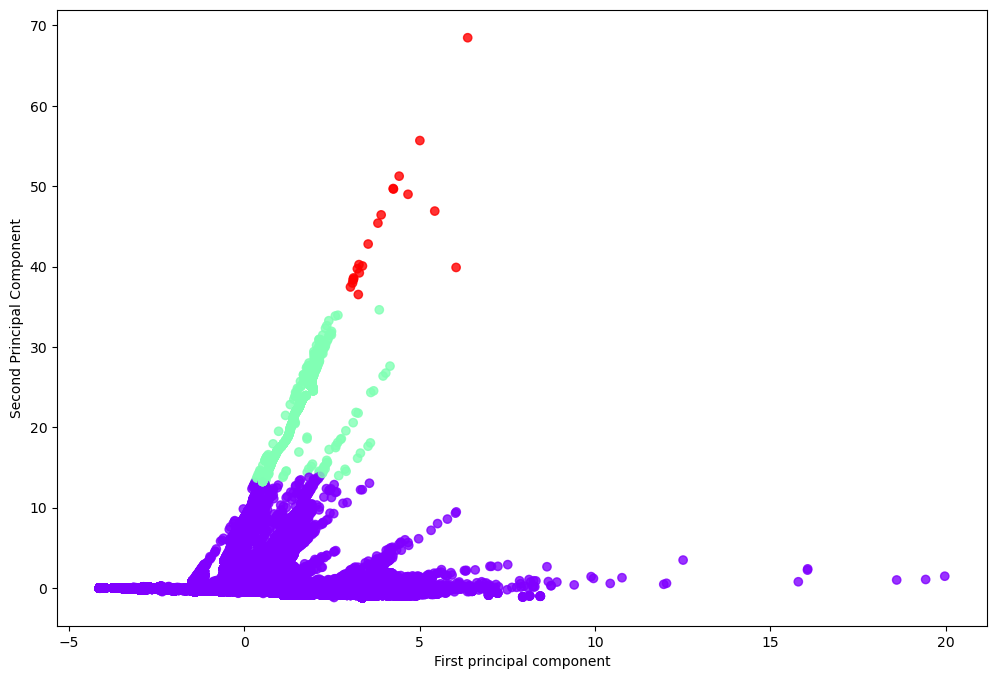

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label2,cmap='rainbow', alpha=0.8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [60]:
# Просмотр того, как распределились данные 
label2 = pd.Series(label2)
label2.value_counts()

0    372332
1      1065
2        21
dtype: int64

### GaussianMixture

In [61]:
# Получение распределения от GaussianMixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(3, covariance_type='full', random_state=0).fit(x_pca)

labels3 = gmm.predict(x_pca)

Text(0, 0.5, 'Second Principal Component')

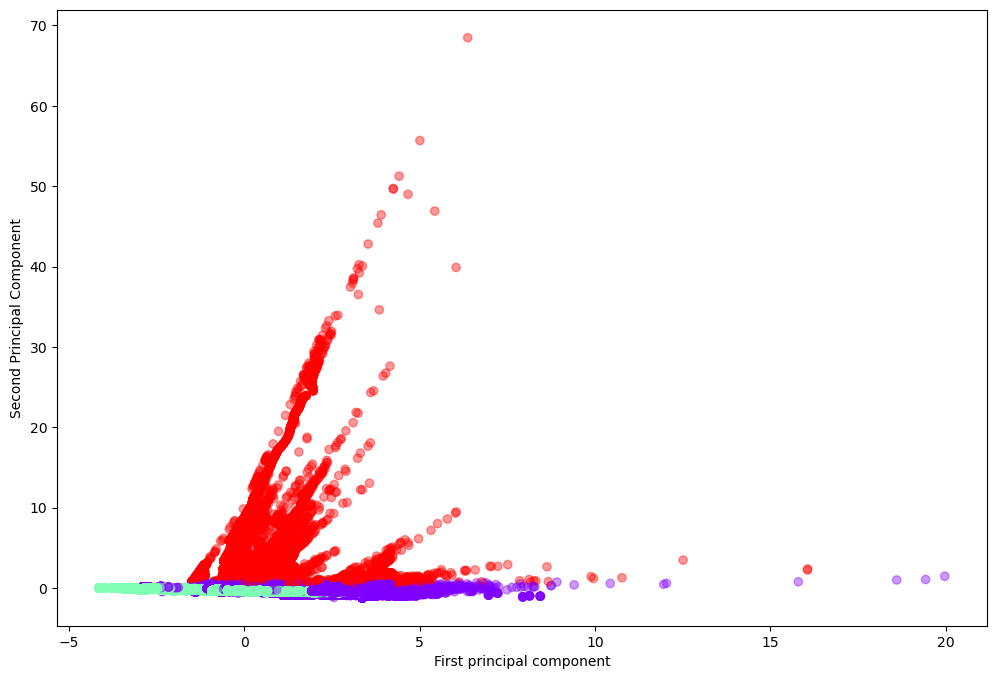

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels3,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [63]:
labels3 = pd.Series(labels3)
labels3.value_counts()

1    263002
0     90265
2     20151
dtype: int64

Из представленных данных можно сделать вывод, что при кластеризации методом K-means, GaussianMixture, Birch данные были распределены неравномерно между кластерами. Большинство точек данных были отнесены к какому то одному кластеру.

Это распределение может говорить о нескольких вещах:
1. Точки данных могут быть неоднородными и действительно группируются в таком соотношении.
2. Возможно, кластеризация не совсем корректно отражает структуру данных из-за того, что выбранное количество кластеров не соответствует реальному распределению данных. Возможно, если бы количество кластеров было другим, результаты распределения выглядели бы иначе.
3. Другая мера качества кластеризации, такая как силуэтный коэффициент, также могла бы помочь интерпретировать качество кластеризации, оценивая не только внутрикластерные расстояния, но и расстояния между кластерами.

Тем не менее, для более точных выводов потребуется дополнительный анализ, возможно, включая визуализацию распределения точек данных по кластерам или использование дополнительных метрик, чтобы лучше понять природу этих кластеров (но мы этого конечно же делать не будем :) ).

## Метрики качества кластеризации

In [64]:
# Импорт метрик
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [65]:
# Вывод оценки метрик
print('метрики kmeans = ' + str(metrics.calinski_harabasz_score(x_pca, label)) + '\n' +
     'метрики Birch = ' + str(metrics.calinski_harabasz_score(x_pca, label2)) + '\n' +
      'метрики GaussianMixture = ' + str(metrics.calinski_harabasz_score(x_pca, labels3)))

метрики kmeans = 344311.3179305591
метрики Birch = 56522.978634755375
метрики GaussianMixture = 109192.49179047106


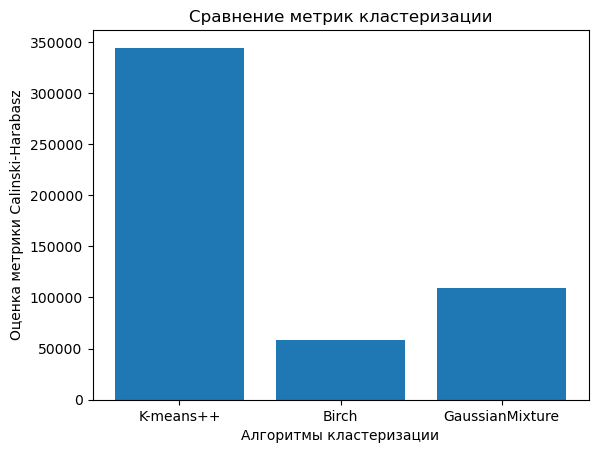

In [51]:
# Расчет метрики Calinski-Harabasz для каждого метода кластеризации
kmeans_metric = metrics.calinski_harabasz_score(x_pca, label)
birch_metric = metrics.calinski_harabasz_score(x_pca, label2)
gaussian_mixture_metric = metrics.calinski_harabasz_score(x_pca, labels3)

# Создание списка со значениями метрик
metric_values = [kmeans_metric, birch_metric, gaussian_mixture_metric]

# Создание списка с названиями алгоритмов
alg_names = ['K-means++', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Сравнение метрик кластеризации')
plt.xlabel('Алгоритмы кластеризации')
plt.ylabel('Оценка метрики Calinski-Harabasz')

# Показать график
plt.show()

0.5160294806291037
0.8842354129562245
0.2851258380292748


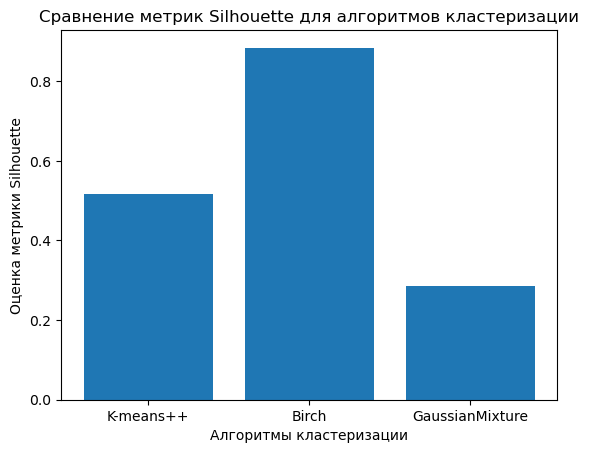

In [67]:
# Расчет метрики Silhouette для каждого метода кластеризации
kmeans_silhouette = metrics.silhouette_score(x_pca, label)
print(str(kmeans_silhouette))
birch_silhouette = metrics.silhouette_score(x_pca, label2)
print(str(birch_silhouette))
gaussian_mixture_silhouette = metrics.silhouette_score(x_pca, labels3)
print(str(gaussian_mixture_silhouette))

# Создание списка со значениями метрик
silhouette_values = [kmeans_silhouette, birch_silhouette, gaussian_mixture_silhouette]

# Создание списка с названиями алгоритмов
alg_names = ['K-means++', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, silhouette_values)

# Добавление заголовка и меток осей
plt.title('Сравнение метрик Silhouette для алгоритмов кластеризации')
plt.xlabel('Алгоритмы кластеризации')
plt.ylabel('Оценка метрики Silhouette')

# Показать график
plt.show()

0.6415562822912593
0.38935862316964776
1.053155186684114


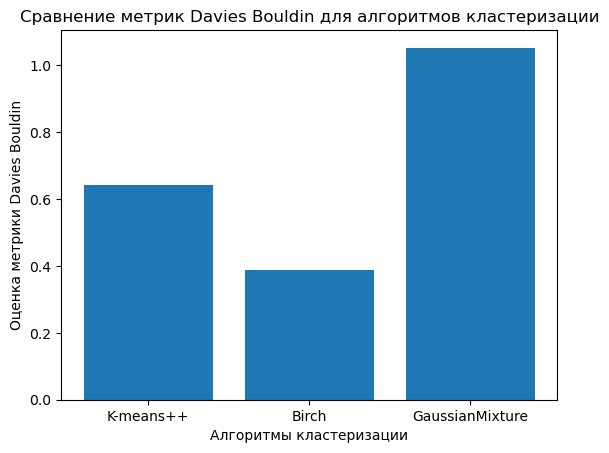

In [66]:
# Расчет метрики Davies Bouldin для каждого метода кластеризации
kmeans_davies = metrics.davies_bouldin_score(x_pca, label)
print(str(kmeans_davies))
birch_davies = metrics.davies_bouldin_score(x_pca, label2)
print(str(birch_davies))
gaussian_mixture_davies = metrics.davies_bouldin_score(x_pca, labels3)
print(str(gaussian_mixture_davies))

# Создание списка со значениями метрик
davies_values = [kmeans_davies, birch_davies, gaussian_mixture_davies]

# Создание списка с названиями алгоритмов
alg_names = ['K-means++', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, davies_values)

# Добавление заголовка и меток осей
plt.title('Сравнение метрик Davies Bouldin для алгоритмов кластеризации')
plt.xlabel('Алгоритмы кластеризации')
plt.ylabel('Оценка метрики Davies Bouldin')

# Показать график
plt.show()

Из результатов метрик можем заключить, что метод k-means показывает лучший результат согласно метрикам Calinski-Harabasz Score, Silhouette Score, Davies Bouldin Score.

Результат метрик для k-means показал наилучшие результаты в Calinski-Harabasz и средние результаты в других метриках.

Таким образом, k-means — лучший метод из рассмотренных, а Birch — худший, основываясь на данных метриках. Birch имеет самый низкий показатель, что может указывать на более разреженные или неправильно разделенные кластеры по сравнению с другими методами. GaussianMixture показывает средние результаты, лучше Birch, но хуже, чем у k-means.

Кластеры успешно добавились в датафрейм

In [59]:
data['Date'] = data_date
data['location'] = data_location

In [62]:
import joblib

# Your trained model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
label = kmeans.fit_predict(x_pca)

# Saving the model to a file
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

## 1.6 Подготовка отчёта

### 1.1 Парсинг данных

1. Скачиваем файл по ссылке и создаём датасет из данных файла
2. Выводим несколько элементов из датасета, анализируем их
3. Получен датасет с 67 колонками (признаками) и с 373418 строками (записей), присутствует множество пустых значения
4. Переводим тип признака "date" из строкового в дату
5. Делаем выборку данных из датасета по месяцам для взятия 40% от изначального датасета
6. Получен датасет с 150632 строками (40% данных от изнчального датасета)

В результате был получен набор данных состоящий из 373418 записей, также в данном наборе содержатся множество записей с пустыми значениями. В дальнейшем они будут заполнены/удалены.

### 1.2 Предобработка данных и выделение значимых атрибутов

1. Удаляем атрибуты с недостающим процентом записей выше порогового значения
2. Заполняем пропущенные значения в датасете
3. Строим графики гистограмм для каждого признака и сравниваем разницу между распределениями до и после устранения пропусков
4. Преобразуем категориальные признаки в числовые
5. Делаем отбор значимых признаков

В данном наборе остались такие атрибуты как: континент, местность, всего случаев, новые случаи, всего смертей, новые смерти, всего случаев на миллион, новые случаи на миллион, сглаженные новые случаи на миллион, всего смертей на миллион, новые смерти на миллион, сглаженные новые смерти на миллион, плотность населения, люди старше 65 лет, GDP на душу населения, 
сердечно-сосудистая смертность, распространенность диабета, качество жизни, индекс человеческого развития, популяция, дата. Все эти признаки были отобраны после: удаления атрибутов с множеством пустых значений, удаления атрибутов сильно коррелирующих друг с другом, отбора значимых признаков.

В результате был получен набор данных состоящий из 21 признака с заполненными пустыми значениями.

### 1.3 Описание структуры набора данных

1. Описываем каждый атрибут данных в датасете
2. Определяем нормальность распределения данных в атрибутах через гистограммы

В результате мы узнали подробности о каждом атрибуте в датасете, а также узнали в каких атрибутах данные распределены ненормально. В нашем случае это популяция.

### 1.4 Формирование дополнительных атрибутов

1. Добавляем новый атрибут (Коэффициент распространения коронавируса - RT) в датасет 
2. Заполняем его через алгоритм на основе данных по приросту новых случаев за последние 8 суток

В итоге мы получили датасет с новым атрибутом RT. Простыми словами, коэффициент распространения коронавируса показывает, сколько человек в среднем успевает заразить один инфицированный до его изоляции. Согласно рекомендациям Роспотребнадзора, регионы, где показатель Rt равен или меньше 1, могут приступать к смягчению ограничительных мер из-за коронавируса. Если коэффициент снижается до 0,8 и менее, регион может перейти ко второму этапу, при значении 0,5 и менее - к третьему.

### 1.5 Кластеризация набора данных

1. Сделаем скалирование данных
2. Уменьшаем размерность датафрейма до 2-х измерений
3. Найдём наилучшее кол-во кластеров через метод локтя
4. Делаем кластеризацию через K-means++ и строим график распределения кластеров в K-means++
5. Делаем кластеризацию через Birch и строим график распределения кластеров в Birch
6. Делаем кластеризацию через GaussianMixture и строим график распределения кластеров в GaussianMixtur
7. Выводим оценки метрик K-means++, Birch и GausiianMixture

Из результатов метрик можем заключить, что метод k-means показывает лучший результат согласно метрике Calinski-Harabasz Score. Счет Calinski-Harabasz представляет собой меру, которая оценивает качество кластеризации, и высокое значение указывает на то, что кластеры плотно сгруппированы.

Результат метрики для k-means равен 344309.4566893674, что значительно выше, чем у Birch с результатом 56522.68991155409 и GaussianMixture с результатом 109325.29298816828. Это указывает на то, что кластеризация, выполненная с помощью k-means, имеет более высокое качество с точки зрения внутрикластерного расстояния и разделения между кластерами.

Таким образом, k-means — лучший метод из рассмотренных, а Birch — худший, основываясь на данной метрике. Birch имеет самый низкий показатель, что может указывать на более разреженные или неправильно разделенные кластеры по сравнению с другими методами. GaussianMixture показывает средние результаты, лучше Birch, но хуже, чем у k-means.

### 1.6 Подготовка отчёта

Подготовим результирующий файл Data.zip который будет содержать данные полученного датасета в формате csv и файл этого notebook'a в формате ipynb и html.

In [63]:
import zipfile # для архивации
import nbformat
from nbconvert import HTMLExporter

# Записать DataFrame в CSV файл
csv_file = 'data.csv' # Имя файла, который мы хотим создать
data.to_csv(csv_file, index=False)

# Создание переменной с файлом notebook'a
ipynb_file = 'Damir_Session1.ipynb'

# Конвертирование .ipynb в .html
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'

# Загрузить содержимое .ipynb файла
with open(ipynb_file, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.reads(f.read(), as_version=4)
    
# Конвертирование в HTML
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Запись HTML в файл
html_file = ipynb_file.replace('.ipynb', '.html')
with open(html_file, 'w', encoding='utf-8') as f:
    f.write(body)
    
# Создание строки со содержанием для README.md
readme_content = """
## Содержимое архива

**data.csv** - результирующий набор данных, полученный в конце первой сессии.
**Damir_Session1.ipynb** - файл в формате ipynb, содержащий визуальную часть и логическую (код) часть, в котором присутствует полный ход работы на первой сессии.
**Damir_Session1.html** - файл в формате html, содержащий визуальную часть и логическую (код) часть, в котором присутствует полный ход работы на первой сессии.
**README.md** - файл, в котором содержится описание всех файлов в zip-архиве Data.zip.
"""

# Создание файла README.md и запись в него содержимого
readme_file = 'README.md'
with open(readme_file, 'w', encoding='utf-8') as f:
    f.write(readme_content.strip())

# Архивировать CSV файл в ZIP-архив
zip_file = 'Data.zip' # Имя создаваемого архива

# Создание архива и добавление файлов
with zipfile.ZipFile(zip_file, 'w') as zip:
    zip.write(csv_file, arcname=csv_file)
    zip.write(ipynb_file, arcname=ipynb_file)
    zip.write(html_file, arcname=html_file)
    zip.write(readme_file, arcname=readme_file)

# После этого 'Data.zip' будет содержать 'data.csv', 'Damir_Session1.ipynb', 'Damir_Session1.html' и 'README.md'